<a href="https://colab.research.google.com/github/Ajinkya1214/ajinkya/blob/master/18110013_DataScience_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q4 Misra-Gries Algo


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def mg_estimate(stream,k):

  # stream = process_stream(stream)
  dic_mg = {} #misra-gries
  
  for (x,c) in stream:
    # print(dic_mg)

    if x in dic_mg :
      dic_mg[x]+=c

    else :
      if len(dic_mg) < k-1 :
        dic_mg[x] = c
      else : #decrease freq of each element by 1 and drop it if its freq becomes 0, also ignore the current element x
        keys = list(dic_mg.keys())
        for key in keys:
          dic_mg[key]-=1
          if dic_mg[key] == 0:
            del dic_mg[key]

  return dic_mg # k-1 most frequent(have actual freq greater than m/k) elements and their estimated freq

# Count Min

In [ ]:
#random hash function
def hash_func(x,param):
  a = param[0]
  b = param[1]
  p = param[2]
  d = param[3]
  return ((a*x+b)%p)%d

In [ ]:
#two wise indep hash function
def g(x,param):
  a = param[0]
  b= param[1]
  c = (a*x+b)%2
  if c == 0:
    return -1

  return 1

In [ ]:
#set of two wise indep hash funcs
def hash_famg(w):

  fam = {}

  for i in range(w):
    a = int(random.random()*2)
    b = int(random.random()*2)
    fam[i] = [a,b]

  return fam

In [ ]:
#set of random hash functions
def hash_fam(w,d):

  fam = {}

  p = 2**31 - 1

  for i in range(w):
    a = int(random.random()*p) #random int from [1,p-1]
    b = int(random.random()*p)
    fam[i] = [a,b,p,d] #param for ith hash func

  return fam

In [ ]:
class CountMin():

  def __init__(self,w,d):

    self.hash_fam = hash_fam(w,d)
    self.sketch = np.zeros((w,d))
    return

  def estimate(self,stream):

    for (id,c) in stream :
      for i in range(len(self.hash_fam)):
        bucket = hash_func(id,self.hash_fam[i])
        self.sketch[i][bucket] += c

    return

  def query(self,x):

    est = []
    for i in range(len(self.hash_fam)):
      bucket = hash_func(x,self.hash_fam[i])
      yi = self.sketch[i][bucket]
      est.append(yi)
    
    est = np.array(est)

    return np.min(est)

# Count Sketch

In [ ]:
class CountSketch():

  def __init__(self,w,d):

    self.hash_famh = hash_fam(w,d)
    self.hash_famg = hash_famg(w)
    self.sketch = np.zeros((w,d))

    return

  def estimate(self,stream):

    for (id,c) in stream :
      for i in range(len(self.hash_famh)):
        bucket = hash_func(id,self.hash_famh[i])
        sign = g(id,self.hash_famg[i])
        self.sketch[i][bucket] += sign*c
    
    return

  def query(self,x):

    est = []

    for i in range(len(self.hash_famh)):
      bucket = hash_func(x,self.hash_famh[i])
      sign = g(x,self.hash_famg[i])
      yi = sign*(self.sketch[i][bucket])
      est.append(yi)

    est = np.array(est)

    return np.median(est)
  

# Comparison

In [ ]:
def true_freq(stream):

  dic = {}
  for (id,c) in stream:
    if id in dic:
      dic[id] += c
    else :
      dic[id] = c
  
  arr = []
  for x in dic:
    arr.append((x,dic[x]))
  
  arr = sorted(arr,key = lambda x:x[1])
  arr.reverse()
  arr = arr[:1000] #top thousand most frequent elements

  return dic,arr

In [ ]:
def estimates(stream,w,k):

  mg = mg_estimate(stream,k) #dic
  d = int(k/w)
  cmin = CountMin(w,d)
  cmin.estimate(stream)
  cs = CountSketch(w,d)
  cs.estimate(stream)

  return mg, cmin, cs


In [ ]:
def generate_query(stream,arr):

  indices = random.sample(range(0,100),100)

  query_stream = []
  for i in indices:
    query_stream.append(arr[i])

  return query_stream

In [ ]:
#stream

f = open('train.data','r')
rows = f.readlines()

In [ ]:
stream = []
for r in rows:
  a = r.split(' ')
  id = int(a[1])
  c = int(a[2][:-1])
  stream.append((id,c))

In [ ]:
dic,arr = true_freq(stream)

In [ ]:
query_stream = generate_query(stream,arr)

In [ ]:
ks = [100,200,500,1000,2000]
err_mg = []
err_cmin = []
err_cs = []


100
200
500
1000
2000


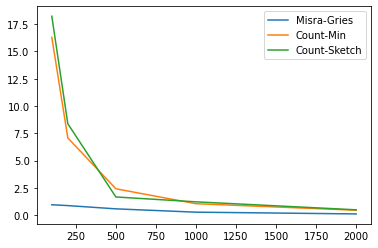

In [ ]:
#make sketches of different size and compute the avg error on query stream
for k in ks:
  print(k)
  mg ,cmin ,cs = estimates(stream,5,k)

  avg_rel_err_mg = 0 
  avg_rel_err_cmin = 0
  avg_rel_err_cs = 0 
  for (x,fx) in query_stream:

    #mg
    if x in mg:
      est = mg[x]
    else:
      est = 0
    avg_rel_err_mg += abs(fx-est)/fx

    #cmin
    est = cmin.query(x)
    avg_rel_err_cmin += abs(fx-est)/fx

    #cs
    est = cs.query(x)
    avg_rel_err_cs += abs(fx-est)/fx

  avg_rel_err_mg /= 100
  avg_rel_err_cmin /= 100
  avg_rel_err_cs /= 100

  err_mg.append(avg_rel_err_mg)
  err_cmin.append(avg_rel_err_cmin)
  err_cs.append(avg_rel_err_cs)


plt.plot(ks,err_mg,label='Misra-Gries')
plt.plot(ks,err_cmin,label='Count-Min')
plt.plot(ks,err_cs,label='Count-Sketch')
plt.legend()
plt.show()


In [ ]:
err_mg

[0.9554447741405405,
 0.8797434799766296,
 0.5798787065145591,
 0.27605103397509057,
 0.11623862113102686]

In [ ]:
err_cmin

[16.299852783865653,
 7.079166237252457,
 2.418207812102622,
 1.0515723581704544,
 0.45373247307940745]

In [ ]:
err_cs

[18.227492906563086,
 8.379914760370141,
 1.6686277449344125,
 1.22261833281812,
 0.49226788918566977]

In [ ]:
#function to find min k for which the avg error over query stream is less than 1%
def get_best_k(stream,query_stream,sketch,l,r):

  for k in range(l,r):
    d = int(k/5)  

    if sketch == 'mg':
      mg = mg_estimate(stream,k) #dic
    elif sketch == 'cmin':
      cmin = CountMin(5,d)
      cmin.estimate(stream)
    else:
      cs = CountSketch(5,d)
      cs.estimate(stream)
  
    avg_rel_err = 0

    for (x,fx) in query_stream:
      est = 0
      #mg
      if sketch == 'mg':
        if x in mg:
          est = mg[x]
        else:
          est = 0

      elif sketch == 'cmin':
        est = cmin.query(x)
      else :
        est = cs.query(x)
      
      avg_rel_err += abs(fx-est)/fx

    avg_rel_err /= 100
    print(avg_rel_err)
    if avg_rel_err*100 < 1 : #AVG_REL_ERR < 1 OR AVG_REL_ERR*100 < 1 ??
      return k
  return 0

In [ ]:
kbest_cmin = get_best_k(stream,query_stream,'cmin',25000,26200)

0.012036906638336332
0.010457528904357527
0.011730152426246388
0.009506412301434721


In [ ]:
kbest_cs = get_best_k(stream,query_stream,'cs',19000,26200)

0.041596003731912544
0.025073197701186243
0.020978272196240454
0.019517894584836274
0.025220269049320905
0.07749011713770662
0.01699197807800118
0.02046408802339693
0.030028311336909367
0.012058164509714258
0.009559664277739658


In [ ]:
kbest_mg = get_best_k(stream,query_stream,'mg',10350,10500)

0.010006476034242255
0.010006476034242255
0.010006476034242255
0.010006476034242255
0.010006476034242255
0.010006476034242255
0.010006476034242255
0.010006476034242255
0.010006476034242255
0.010006476034242255
0.009839701433671551


# Q5 Low Rank Approximation

In [ ]:
import pandas as pd

In [ ]:
rating = pd.read_csv('ratings.csv')
rating.head

<bound method NDFrame.head of         userId  movieId  rating   timestamp
0            1      296     5.0  1147880044
1            1      306     3.5  1147868817
2            1      307     5.0  1147868828
3            1      665     5.0  1147878820
4            1      899     3.5  1147868510
...        ...      ...     ...         ...
860042    5790     1261     4.0  1217130084
860043    5790     1267     4.0  1217129753
860044    5790     1285     3.5  1217130018
860045    5790     1293     4.5  1217129746
860046    5790     1298     3.5      121713

[860047 rows x 4 columns]>

In [ ]:
rating = rating[rating['userId'] < 5790]

In [ ]:
rating.head

<bound method NDFrame.head of         userId  movieId  rating   timestamp
0            1      296     5.0  1147880044
1            1      306     3.5  1147868817
2            1      307     5.0  1147868828
3            1      665     5.0  1147878820
4            1      899     3.5  1147868510
...        ...      ...     ...         ...
860003    5789     4299     1.0   993958811
860004    5789     4308     2.0   993958811
860005    5789     4310     2.0   993958811
860006    5789     4340     4.0   993958961
860007    5789     4344     5.0   993958883

[860008 rows x 4 columns]>

In [ ]:
users = 5789
movies = np.unique(rating['movieId'])
dic = {} #mapping a one to one correspondence between ascending order of movie ids and natural nos (id1:0,id2:1,...)
idx = 0 
for m in movies:
  dic[m] = idx
  idx += 1

cols = len(movies)

In [ ]:
#rating matrix
rows = users + 1
arr = np.zeros((rows,cols))

In [ ]:
#training data
df_train = rating.sample(frac=0.8)

In [ ]:
#fill the rating matrix 
for index,row in df_train.iterrows():

  u = int(row['userId'])
  m = dic[row['movieId']]
  r = int(row['rating'])
  arr[u-1][m] = r


In [ ]:
df_test = rating[~rating.index.isin(df_train.index)]

In [ ]:
#SVD of arr (rating matrix)

U,S,V = np.linalg.svd(arr,full_matrices=False)

In [ ]:
ks = [i for i in range(1,101)]
errs = []
for k in ks :
  #rank k approximation

  low = np.zeros((arr.shape[0],arr.shape[1]))

  for i in range(k):
    sigmai = S[i]
    ui = U[:,i]
    ui = np.reshape(ui,(ui.shape[0],1))
    vi = V[i,:]
    vi = np.reshape(vi,(vi.shape[0],1))
    matrix_i = np.dot(sigmai*ui,np.transpose(vi)) 
    low = np.add(low,matrix_i)
  
  #calculate error on test data
  err = 0
  for index,row in df_test.iterrows():
      sij = row['rating']
      i = int(row['userId'])
      j = dic[row['movieId']]
      predij = low[i-1][j]
      err += (sij-predij)**2
  print(err)
  errs.append(err)


1803373.8035729125
1700520.0904785984
1645076.4131681323
1601364.6391505566
1570691.4935636905
1545170.7346255647
1518841.7709614886
1502857.3168617345
1489106.4768787154
1477945.5791472343
1468507.1555608625
1459250.1115943287
1450137.393876295
1443357.2225134985
1437139.214032978
1432728.665398457
1427580.7729814926
1424214.8029553313
1420570.6601600538
1418566.0643816148
1416316.5997249999
1413057.432605461
1412064.618818043
1411192.4769950644
1411129.1531971837
1410479.915889432
1410348.194320377
1409277.0768670554
1408988.3822777276
1408943.8462891919
1408881.129360327
1409490.0874149415
1410733.41061294
1412715.1596552362
1414778.6715879317
1415331.191825176
1417835.89318685
1420536.5285038082
1422039.3096038871
1423098.4111853149
1424543.4978331644
1426097.7643698738
1427180.2319906224
1428191.1986073372
1430469.7757089622
1433111.711351489
1435224.630786993
1436841.2148263392
1438738.9729731265
1441092.8111574769
1442982.8862207006
1445467.5488189324
1446979.2025508701
1449114.

Text(0, 0.5, 'err')

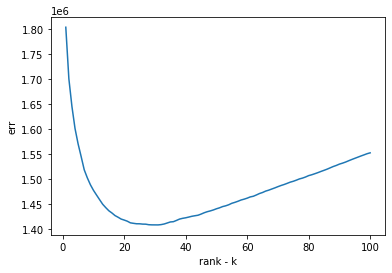

In [ ]:
plt.plot(ks,errs)
plt.xlabel('rank - k')
plt.ylabel('err')

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
usr_avg = {} #userId : avg rating in training data
mov_avg = {} #movieId : avg rating in training data

In [ ]:
users = np.unique(df_train['userId'])

for usrid in users :
   df = df_train[df_train['userId']==usrid] #all movies rated by the user
   sum = np.sum(df['rating'])
   usr_avg[usrid] = sum/df.shape[0]


In [ ]:
mov = np.unique(df_train['movieId'])

for mid in mov :
   df = df_train[df_train['movieId']==mid] #all users(& other cols) who rated for that movie
   sum = np.sum(df['rating'])
   mov_avg[mid] = sum/df.shape[0]

In [ ]:
#creating a new training data
X = []
y = []
for index, row in df_train.iterrows():
  uid = int(row['userId'])
  mid = int(row['movieId'])
  r = int(row['rating'])
  y.append(r)
  X.append([usr_avg[uid],mov_avg[mid]])

In [ ]:
reg = LinearRegression(fit_intercept=False).fit(np.array(X),np.array(y))

In [ ]:
reg.coef_

array([0.47720609, 0.48972965])

In [ ]:
err2 = 0
count = 0
for index,row in df_test.iterrows():

    #ground truth
    sij = row['rating']

    #get the user and movie
    uid = int(row['userId'])
    mid = dic[row['movieId']]

    if uid not in usr_avg or mid not in mov_avg: 
      count += 1
      continue

    uavg = usr_avg[uid]
    mavg = mov_avg[mid]
    
    #predict
    predij = reg.coef_[0]*uavg + reg.coef_[1]*mavg

    err2 += (sij-predij)**2

print(err2)


135905.03660054604


In [ ]:
count

51357

In [ ]:
df_test.shape

(172002, 4)

In [ ]:
err1 = np.min(np.array(errs))
err1

1408881.129360327

In [ ]:
kbest =  np.argmin(np.array(errs),axis=0)
kbest

30